In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
a= yf.download('^GSPC')

In [ ]:
a

In [ ]:
df = pd.read_csv("NIFTY 50_Historical_PR_01041994to30042025.csv")
df.index = pd.to_datetime(df['Date'])
df = df['Close'].to_frame()
# df.sort_index(inplace = True)
# df = df.resample('YS').first()
# #df = df.loc['2021':]
# df['ret'] = df['Close'].pct_change()
# df['prem_rec'] = np.where(df['ret']<0, df['ret'], 0)
# df['prem'] = -0.04
# df['net_ret'] = df['ret'] + df['prem_rec']*-1 + df['prem']
# df['index'] = df['ret'] + 1
# df['strat'] = df['net_ret'] + 1
# df['index'] = df['index'].cumprod()
# df['strat'] = df['strat'].cumprod()
# df = df.fillna(1)
# df['benifit'] = (df['net_ret'] - df['ret'])*100
df

In [ ]:
df['benifit'].plot(kind = 'bar')

In [ ]:
df[['ret','net_ret']].plot(kind = 'bar')

In [ ]:
df[['index','strat']].plot()

In [ ]:
df = pd.read_csv("NIFTY 50_Historical_PR_01041994to30042025.csv")
df.index = pd.to_datetime(df['Date'])
df = df['Close'].to_frame()
df.sort_index(inplace = True)
df = df.resample('YS').first()
df['ret'] = df['Close'].pct_change()
#df.dropna(inplace=True)
df['call_prem'] = 1+ (np.maximum(df['ret']-0.1,-0.1)*3)
df['ret_net'] = df['call_prem'].cumprod()
df['real_nav'] = df['ret']+1
df['real_nav'] = df['real_nav'].cumprod()
df.fillna(1, inplace=True)
df

In [ ]:
df[['ret_net','real_nav']].plot()

In [ ]:
df = pd.read_csv("NIFTY 50_Historical_PR_01041994to30042025.csv")
df.index = pd.to_datetime(df['Date'])
df = df['Close'].to_frame()
df.sort_index(inplace = True)

#df=df.loc['2014':]

df['ret'] = np.log(df['Close']/df['Close'].shift())
df['ma'] = df['Close'].rolling(50).mean()
df['position'] = np.where(df['Close']>df['ma'],1,0)
df['strat_ret'] = df['ret'] * df['position'].shift() * 2
df.dropna(inplace = True)
df['index'] = np.exp(df['ret'].cumsum())
df['strat'] = np.exp(df['strat_ret'].cumsum())


df['index_roll_5'] = ((df['index']/df['index'].shift(252*5))**(1/5)-1)*100
df['start_roll_5'] = ((df['strat']/df['strat'].shift(252*5))**(1/5)-1)*100

df['index_dd'] = (df['index'] - df['index'].cummax())/df['index'].cummax()
df['strat_dd'] = (df['strat'] - df['strat'].cummax())/df['strat'].cummax()



In [ ]:
# Plot both lines
df[['index_roll_5', 'start_roll_5']].plot(figsize = (12,8))

# Fill the area where start_roll_5 < index_roll_5
plt.fill_between(
    df.index,
    -10,
    50,
    where=(df['start_roll_5'] < df['index_roll_5']),
    interpolate=True,
    color='red',
    alpha=0.3,
    label='Strategy underperforms Index'
)

plt.legend()
plt.show()

In [ ]:
df[['index','strat']].plot()

In [ ]:
df[['index_dd','strat_dd']].plot()

In [13]:
a = yf.download("^GSPC")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^GSPC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [8]:
df = pd.read_csv("NIFTY 50_Historical_PR_01041994to30042025.csv")
df.index = pd.to_datetime(df['Date'])
df = df['Close'].to_frame()
df.sort_index(inplace = True)
df['ma'] = df['Close'].rolling(50).mean()
df= df.dropna()

df

,Close,ma
Date,,
1994-06-17,1302.60,1199.410
1994-06-20,1318.50,1202.134
1994-06-22,1313.80,1204.638
1994-06-23,1300.80,1206.596
1994-06-24,1287.10,1208.278
...,...,...
2025-04-23,24328.95,23012.648
2025-04-24,24246.70,23023.656
2025-04-25,24039.35,23032.376


In [9]:
results = []
trade = False
capital = 1
leverage = 2
for i in range(len(df)):
    
    if trade == False:
        if df['Close'].iloc[i]>df['ma'].iloc[i]:
            trade_entry_price = df['Close'].iloc[i]
            trade_entry_date = df.index[i]
            shares = capital/trade_entry_price
            trade = True
            
    if trade==True:
        results.append([df.index[i], 
                        capital + (df['Close'].iloc[i] - trade_entry_price)* shares* leverage])
        
        if df['Close'].iloc[i]<df['ma'].iloc[i]:
            trade_exit_price = df['Close'].iloc[i]
            profit = (trade_exit_price-trade_entry_price)*shares*leverage
            capital+=profit
            trade = False
    

In [10]:
df1 = pd.DataFrame(results, columns = ['date','capital'])
df1.set_index('date', drop = True, inplace = True)
df1['drawdown'] = (df1['capital'] - df1['capital'].cummax())/df1['capital'].cummax()
df1

,capital,drawdown
date,,
1994-06-17,1.000000,0.000000
1994-06-20,1.024413,0.000000
1994-06-22,1.017196,-0.007044
1994-06-23,0.997236,-0.026529
1994-06-24,0.976201,-0.047062
...,...,...
2025-04-23,699.427091,-0.075320
2025-04-24,694.884702,-0.081325
2025-04-25,683.433464,-0.096464


<Axes: xlabel='date'>

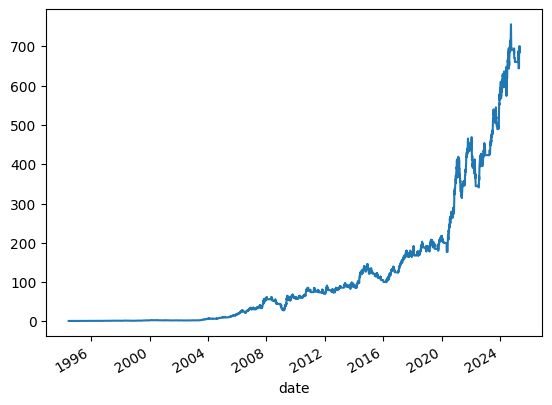

In [11]:
df1['capital'].plot()
#plt.yscale('log')

<Axes: xlabel='date'>

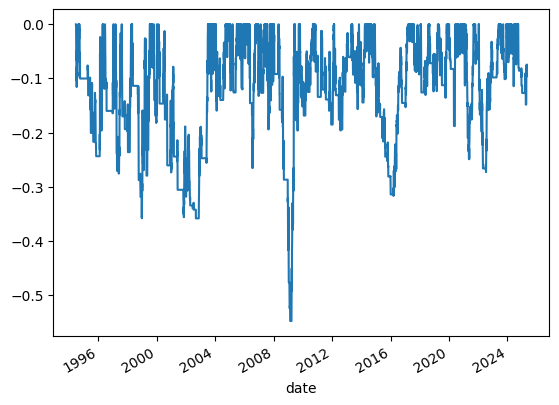

In [12]:
df1['drawdown'].plot()